# Titanic Tutorial by YouhanLee - 3rd Try

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn setting
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Load Dataset

In [145]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [146]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [148]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1. Check Null Data

In [150]:
# train 데이터
for col in df_train.columns:
    msg = '피처 : {:>12}\t NaN 데이터 비율 : {:.2f}%'.format(
        col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

피처 :  PassengerId	 NaN 데이터 비율 : 0.00%
피처 :     Survived	 NaN 데이터 비율 : 0.00%
피처 :       Pclass	 NaN 데이터 비율 : 0.00%
피처 :         Name	 NaN 데이터 비율 : 0.00%
피처 :          Sex	 NaN 데이터 비율 : 0.00%
피처 :          Age	 NaN 데이터 비율 : 19.87%
피처 :        SibSp	 NaN 데이터 비율 : 0.00%
피처 :        Parch	 NaN 데이터 비율 : 0.00%
피처 :       Ticket	 NaN 데이터 비율 : 0.00%
피처 :         Fare	 NaN 데이터 비율 : 0.00%
피처 :        Cabin	 NaN 데이터 비율 : 77.10%
피처 :     Embarked	 NaN 데이터 비율 : 0.22%


In [151]:
# test 데이터
for col in df_test.columns:
    msg = '피처 : {:>12}\t NaN 데이터 비율 : {:.2f}%'.format(
        col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

피처 :  PassengerId	 NaN 데이터 비율 : 0.00%
피처 :       Pclass	 NaN 데이터 비율 : 0.00%
피처 :         Name	 NaN 데이터 비율 : 0.00%
피처 :          Sex	 NaN 데이터 비율 : 0.00%
피처 :          Age	 NaN 데이터 비율 : 20.57%
피처 :        SibSp	 NaN 데이터 비율 : 0.00%
피처 :        Parch	 NaN 데이터 비율 : 0.00%
피처 :       Ticket	 NaN 데이터 비율 : 0.00%
피처 :         Fare	 NaN 데이터 비율 : 0.24%
피처 :        Cabin	 NaN 데이터 비율 : 78.23%
피처 :     Embarked	 NaN 데이터 비율 : 0.00%


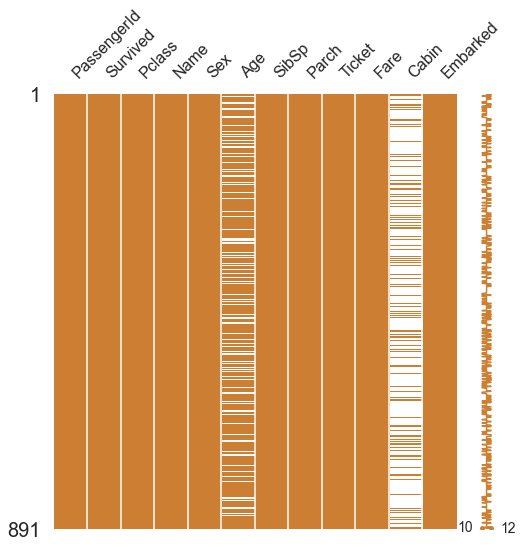

In [152]:
# train 데이터의 null 데이터 시각화 - matrix
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

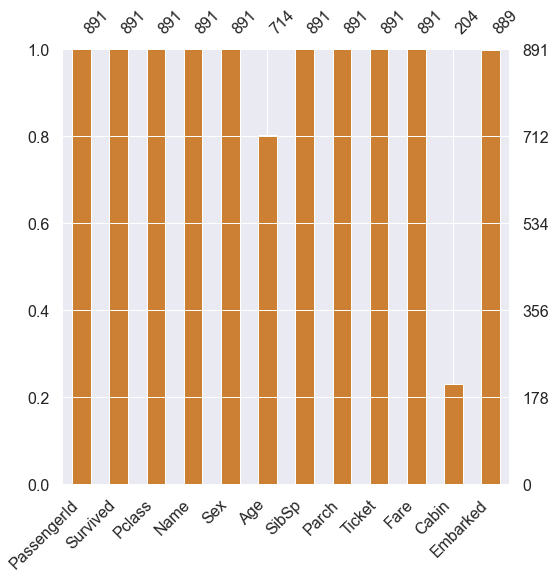

In [153]:
# train 데이터의 null 데이터 시각화 - barplot
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### 1.2. Check Target Label

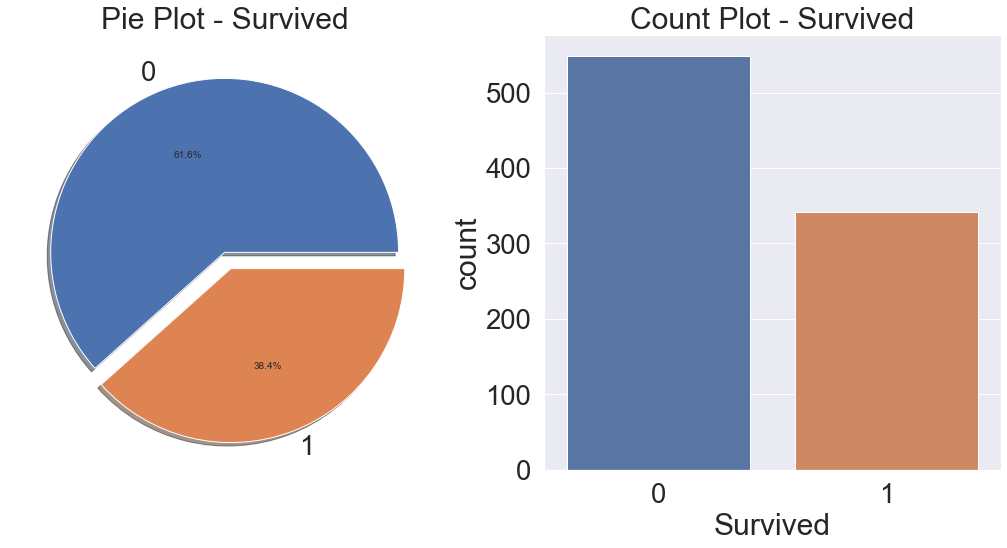

In [154]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 생존자/사망자 비율 - pie plot
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

# 생존자/사망자 수 - countplot
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

## 2. Exploratory Data Analysis

### 2.1. Pclass - Categorical, Ordinal

In [155]:
# Pclass 별 승선객 수 - count()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [156]:
# Pclass 별 생존자 수 - sum()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [157]:
# Pclass 별 생존자/사망자 수 - crosstab
pd.crosstab(df_train['Pclass'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


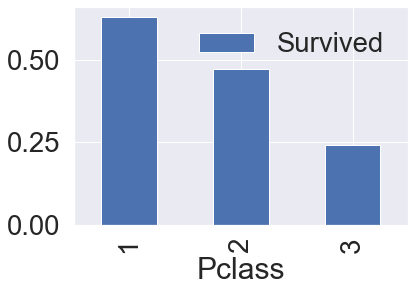

In [158]:
# Pclass별 평균 생존률 - barplot
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar()

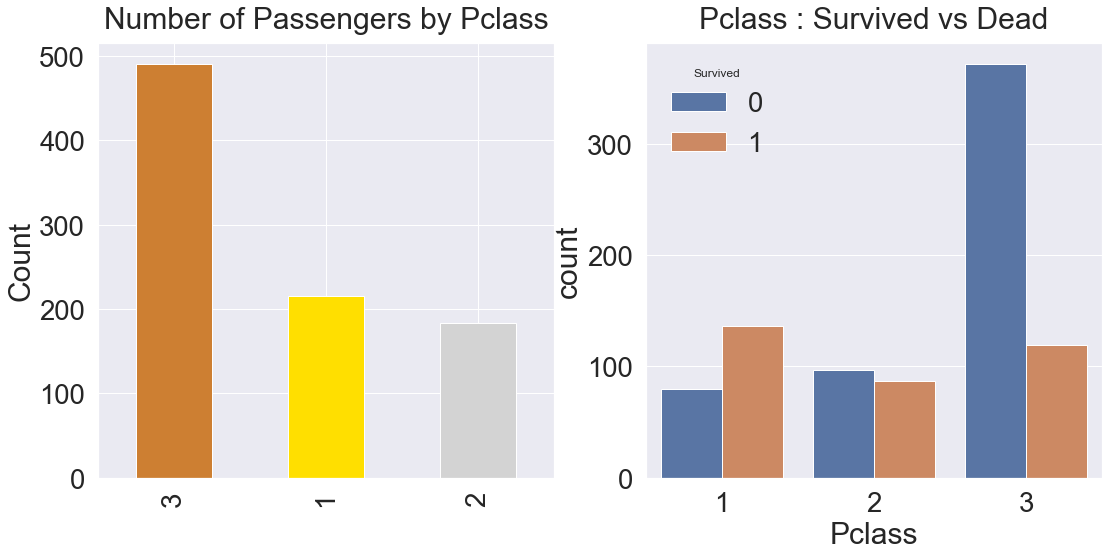

In [159]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pclass별 승선객 수 - barplot
df_train['Pclass'].value_counts().plot.bar(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

# Pclass별 생존자/사망자 수 - countplot
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)

plt.show()

`🔍 OBSERVATION`   
* **Pclass**가 높을수록 생존률이 높다.

### 2.2. Sex - Categorical

In [160]:
# 각 성별의 생존자/사망자 수 - crosstab
pd.crosstab(df_train['Sex'], df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [161]:
# 각 성별의 평균 생존률 - mean()
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=True)

,Survived
Sex,
male,0.188908
female,0.742038


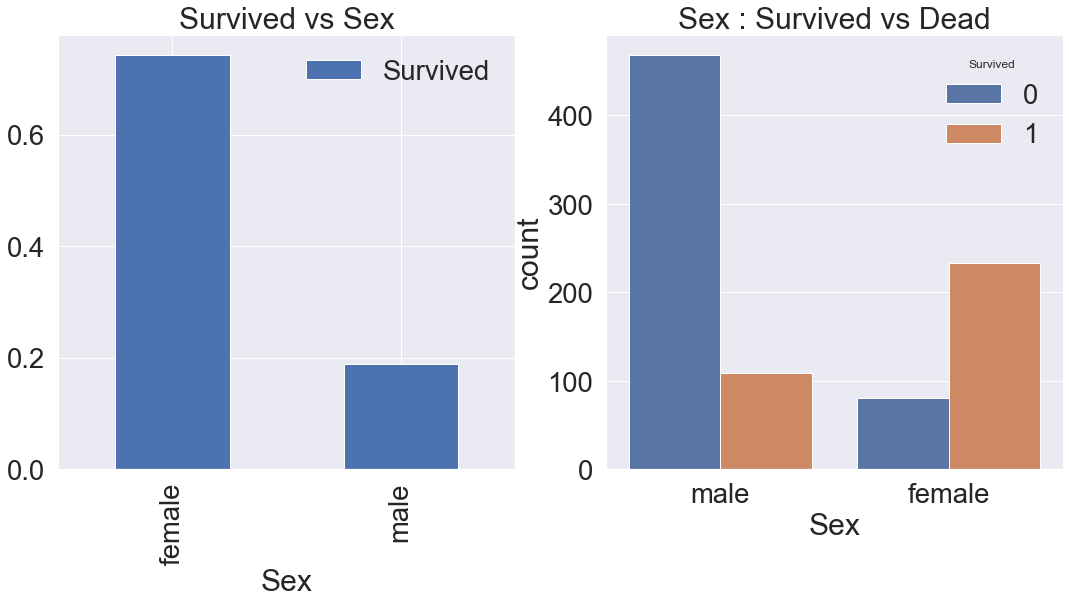

In [162]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# 각 성별 평균 생존률 - barplot
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 각 성별 생존자/사망자 수 - countplot
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

`🔍 OBSERVATION`   
* **여성**일수록 생존률이 높다.

### 2.3. Both Sex and Pclass

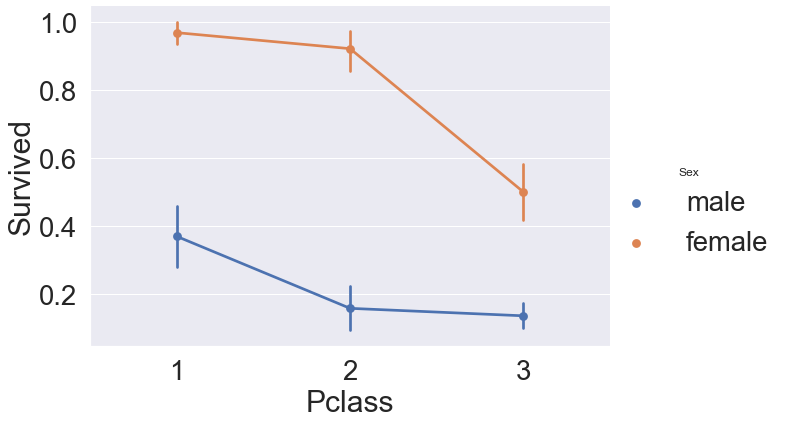

In [163]:
# Pclass, Sex 별 평균 생존률 - factorplot
sns.factorplot('Pclass', 'Survived', hue='Sex',
               data=df_train, size=6, aspect=1.5)

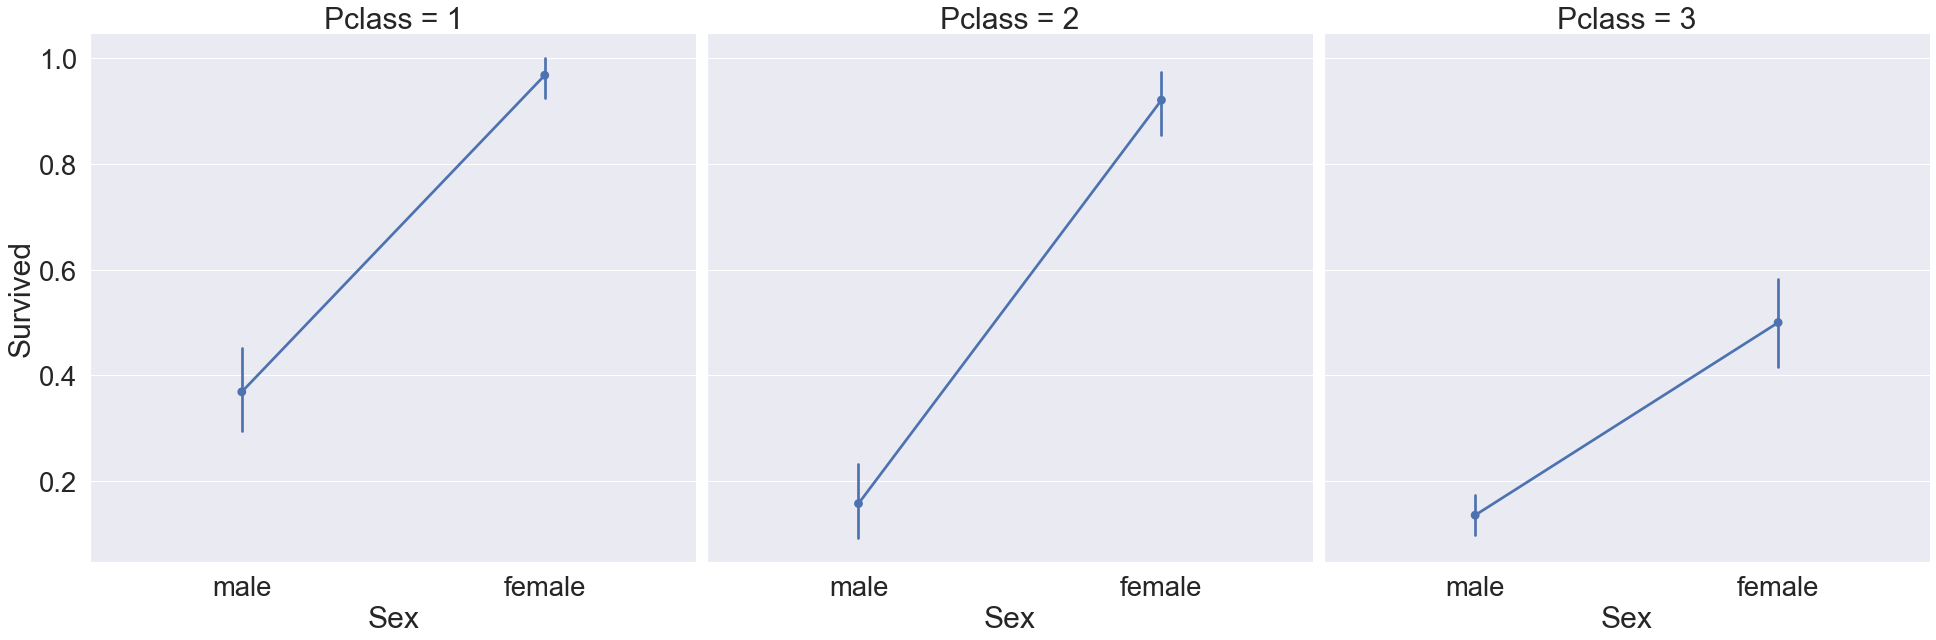

In [164]:
# Pclass, Sex 별 평균 생존률 - factorplot
sns.factorplot(x='Sex', y='Survived', col='Pclass',
               data=df_train, saturation=0.5, size=9, aspect=1)

`🔍 OBSERVATION`   
* Pclass와는 무관하게 여성의 생존률이 매우 높다.
* Pclass 1,2의 여성은 거의 100%에 가까운 생존률을 보인다.
* Pclass 3의 사람들은 성별에 상관없이 낮은 생존률을 보인다.
* Pclass 3의 남성은 매우 낮은 생존률을 보인다.

### 2.4. Age - Continuous

In [165]:
print('제일 나이가 많은 탑승객 : {:.1f} 살'.format(df_train['Age'].max()))
print('제일 나이가 어린 탑승객 : {:.1f} 살'.format(df_train['Age'].min()))
print('탑승객의 평균 나이 : {:.1f} 살'.format(df_train['Age'].mean()))

제일 나이가 많은 탑승객 : 80.0 살
제일 나이가 어린 탑승객 : 0.4 살
탑승객의 평균 나이 : 29.7 살


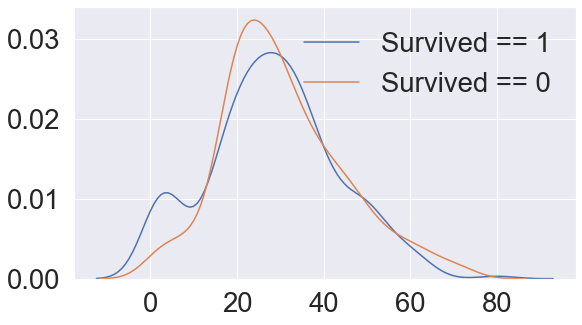

In [166]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

# 생존자/사망자의 나이 분포 (확률 밀도 함수) - kdeplot
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)

plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

`🔍 OBSERVATION`   
* 나이가 어린 사람들의 꽤 많은 사람들이 생존자이다.

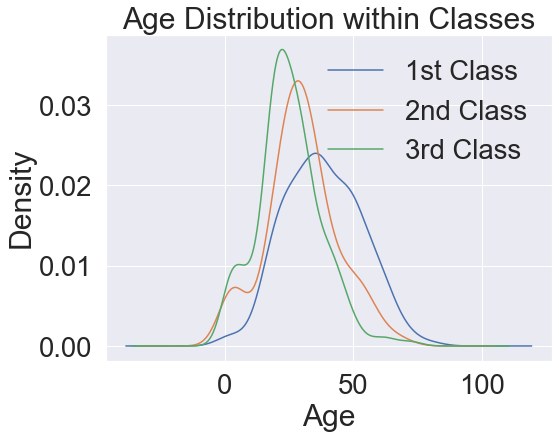

In [167]:
plt.figure(figsize=(8,6))

# 클래스별 나이 분포 (확률밀도함수) - kdeplot
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

`🔍 OBSERVATION`   
* **Pclass**가 낮은수록 나이가 젊은 사람들이 많다.
* Pclass1은 나이의 분포가 다양하다.

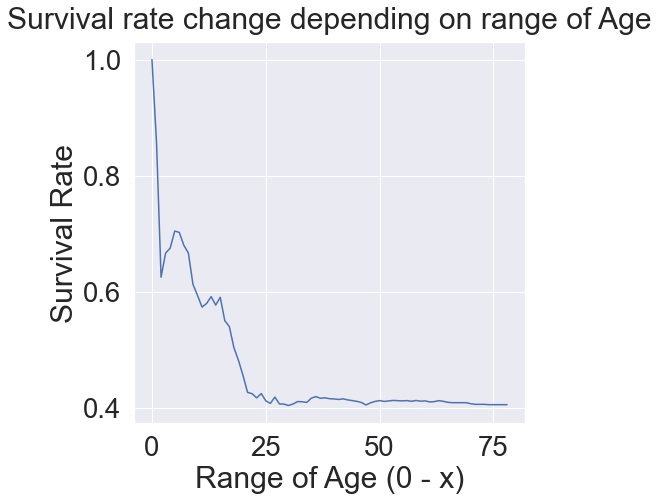

In [168]:
cummulate_survival_ratio = []

# 0살 - i살까지의 생존률 기록
for i in range(1, 80):
    # 0살 - i살까지의 생존자 / 0살 - i살까지의 승선객 (생존자 비율)
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
# 누적 생존률 - plot
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age (0 - x)')

plt.show()

`🔍 OBSERVATION`   
* 나이가 어릴수록 생존되었다. 특히 5살 - 10살 이하의 어린 아이들.
* 15살 정도부터 25살의 청년들이 사망자가 많았다.

### 2.5. Pclass, Sex, Age

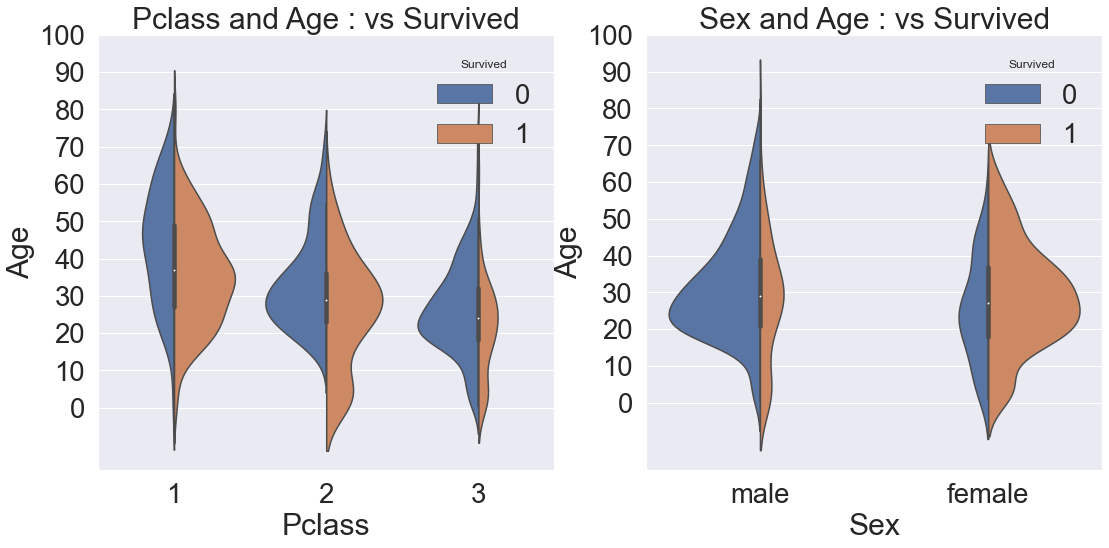

In [169]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

# Pclass와 Age에서의 생존률 분포 - violinplot
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age : vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Sex와 Age에서의 생존률 분포 - violinplot
sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age : vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

`🔍 OBSERVATION`   
* 나이와는 무관하게 Pclass3은 사망자의 비율이 높다.
* Pclass가 높을수록 생존자가 많다.
* Pclass1은 나이와 무관하게 생존률이 높다.
* 성별, Pclass와 무관하게 나이가 어리면 생존되었다.
* 나이와 무관하게 여성의 경우 생존되었다.
* 남성의 경우 사망자가 월등히 많다.

### 2.6. Embarked - Categorical

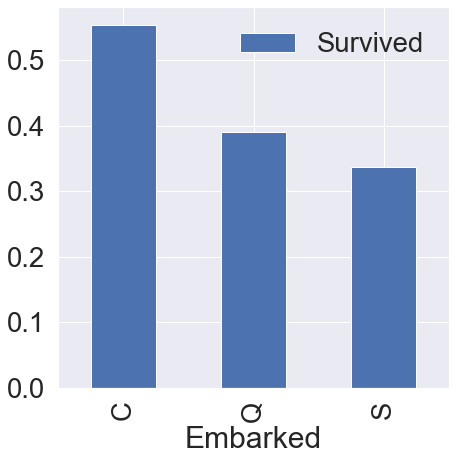

In [170]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))

# Embarked별 평균 생존률 - barplot
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean(
).sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

`🔍 OBSERVATION`   
* 항구 C, Q, S 순으로 생존률이 높다.

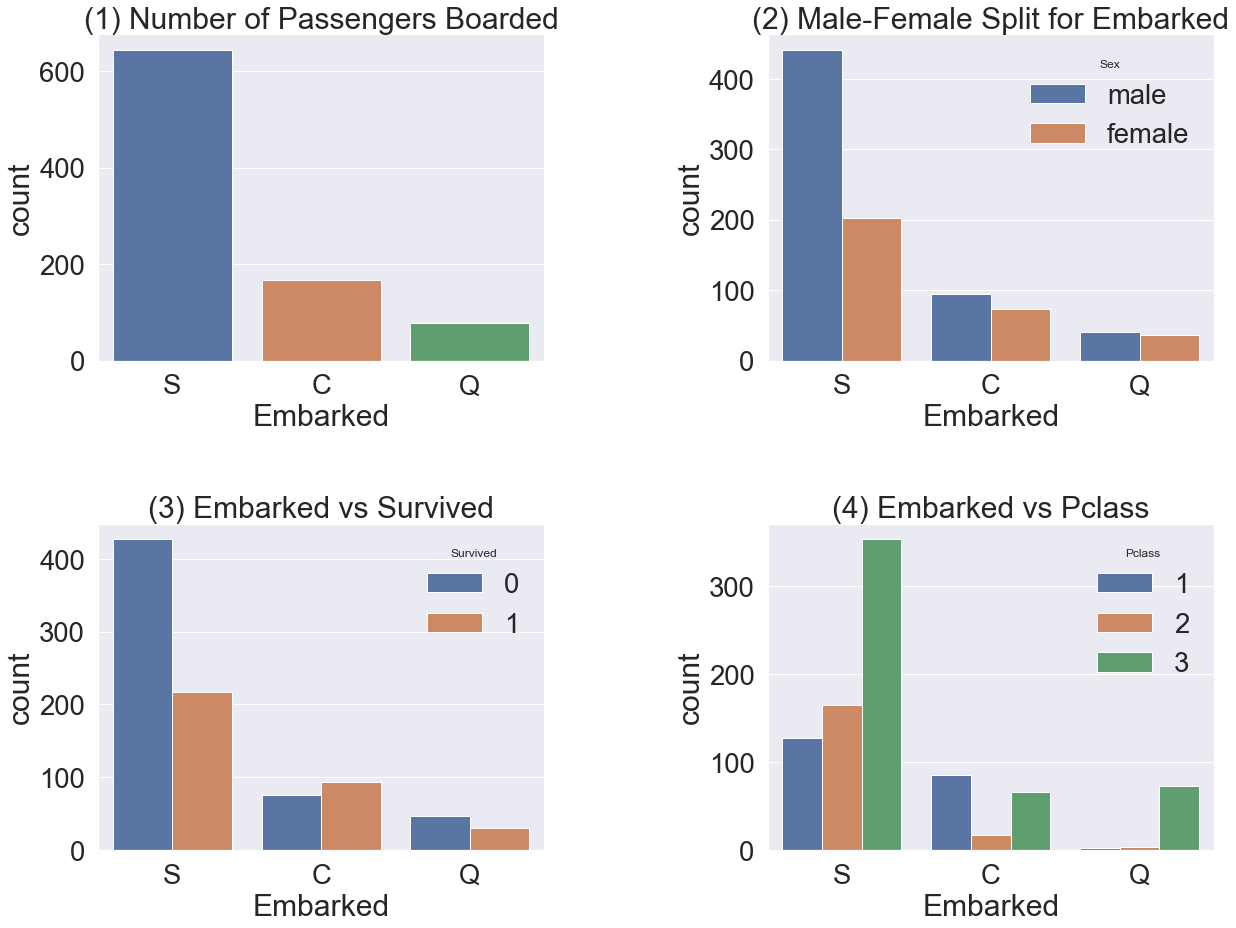

In [171]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 탑승한 곳에 따른 사람 수 - countplot
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) Number of Passengers Boarded')

# 탑승한 곳에 따른 성별 분포 - countplot
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

# 탑승한 곳에 따른 생존률 분포 - countplot
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

# 탑승한 곳에 따른 클래스 분포 - countplot
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

`🔍 OBSERVATION`   
* 항구 S에 탄 승선객의 남성 비율이 높다.
* 항구 C, Q에 탄 승선객의 남녀 비율은 비등비등하다.
* 항구 C의 경우 생존자의 비율이 더 높다.
* 항구 S의 경우 사망자의 비율이 월등히 높다.
* 항구 S에서는 Pclass3의 비율이 높다. → 항구 S의 사망자 비율이 높은 것으로 추측
* 항구 C에서는 Pclass1의 비율이 높다. → 항구 C의 생존자 비율이 높은 것으로 추측
* 항구 Q에서는 대부분이 Pclass3였다.

### 2.7. FamilySize: SibSp, Parch - Discrete

In [172]:
# FamilySize : SibSp와 Parch로 만든 새로운 피처
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [173]:
print('Maximum siz of Family :', df_train['FamilySize'].max())
print('Minimum siz of Family :', df_train['FamilySize'].min())

Maximum siz of Family : 11
Minimum siz of Family : 1


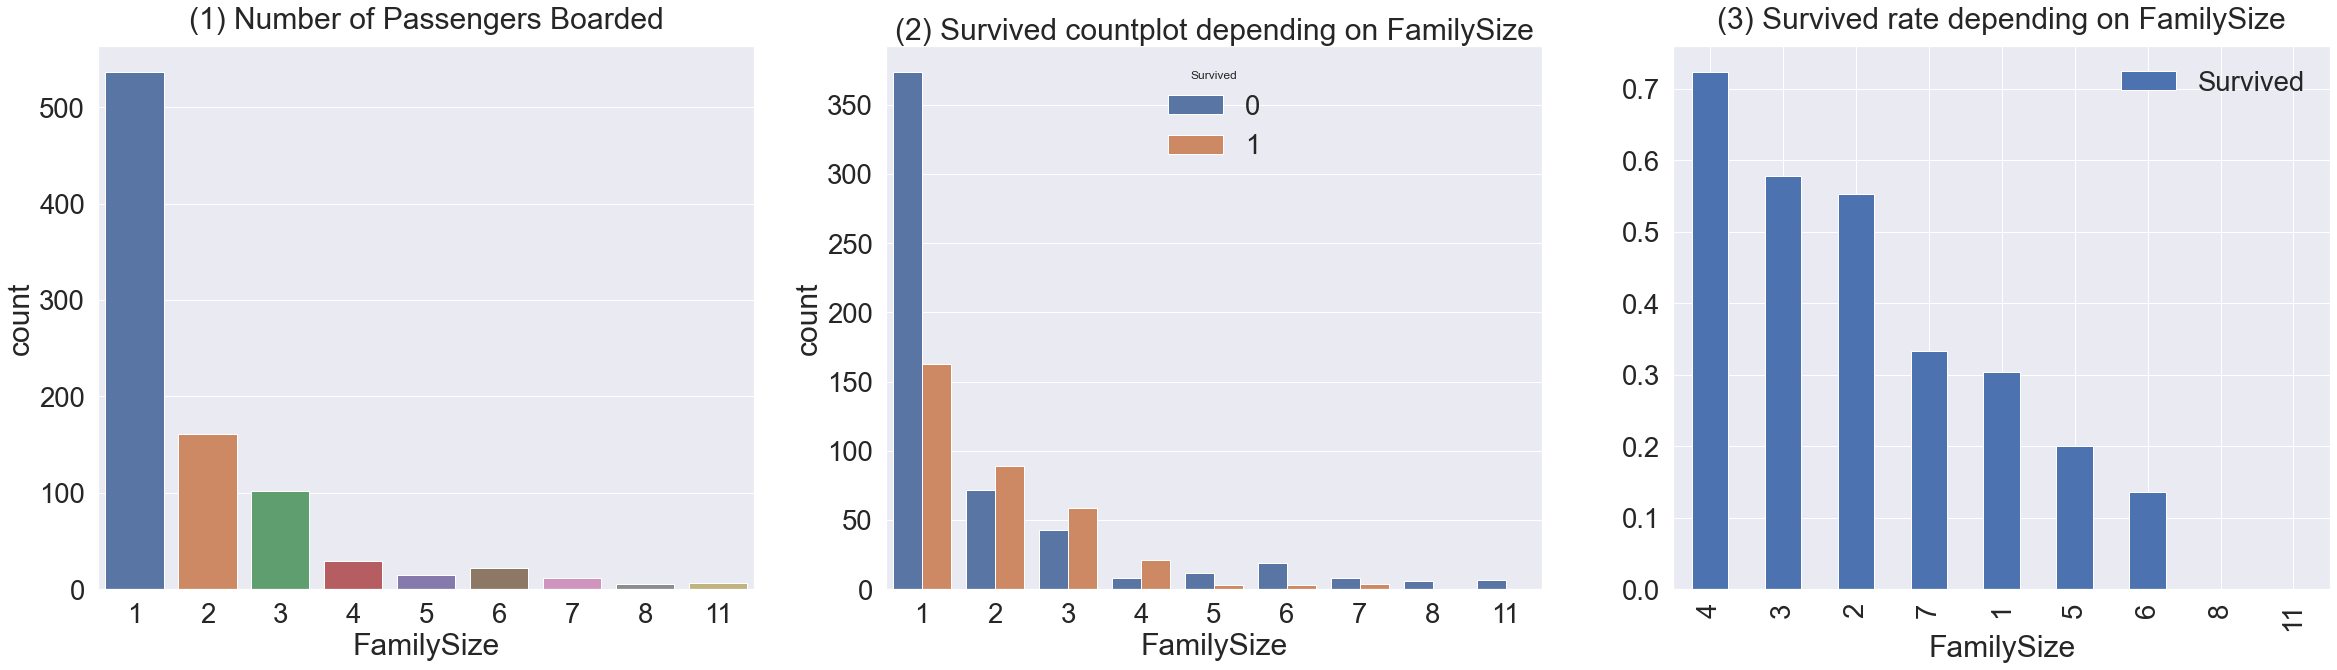

In [174]:
f, ax = plt.subplots(1, 3, figsize=(40,10))

# 가족의 수에 따른 승선객 수 분포 - countplot
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) Number of Passengers Boarded', y=1.02)

# 가족의 수에 따른 생존자 수 분포 - countplot
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize')

# 가족의 수에 따른 생존률 - barplot
df_train[['FamilySize', 'Survived']].groupby(by='FamilySize', as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

`🔍 OBSERVATION`   
* 대부분의 승선객이 혼자였다.
* 가족 크기가 2-4명인 경우 생존률이 높았다.
* 혼자이거나 가족의 수가 5명 이상인 경우 생존률이 매우 낮았다.

### 2.8. Fare - Continous

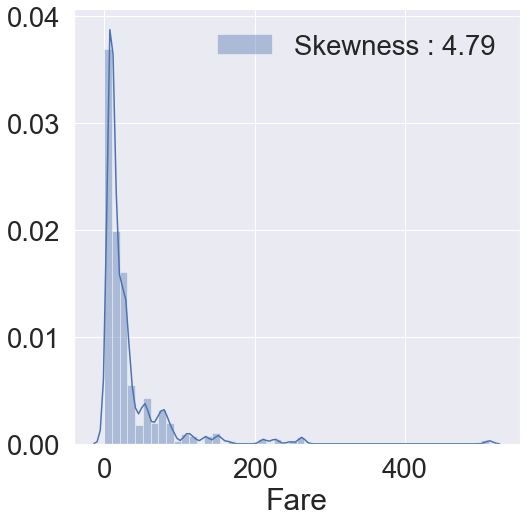

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Fare의 분포 - distplot
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(
    df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [176]:
# Fare의 null값을 평균으로 채움 (test 데이터만 null값 있음)
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [177]:
# 비대칭성 해소를 위해 log를 취해줌
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

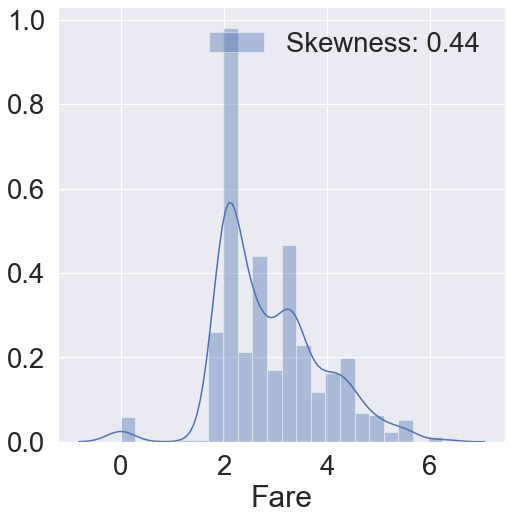

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Fare의 분포 - distplot
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(
    df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### 2.9. Cabin

In [179]:
# null값이 80%라 아에 제외
df_train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

### 2.10. Ticket - String

In [180]:
df_train['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
3101295              6
                    ..
SOTON/OQ 3101316     1
349248               1
250652               1
248706               1
STON/O 2. 3101292    1
Name: Ticket, Length: 681, dtype: int64

## 3. Feature Engineering

### 3.1. Fill null

#### 3.1.1. Fill Null in Age using Title

In [181]:
# Title 추출
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [182]:
# Initial과 Sex별 사람의 수 - crosstab
pd.crosstab(df_train['Initial'], df_train['Sex']
            ).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [183]:
# 잘못된 Initial 고치기
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
                            'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], [
    'Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

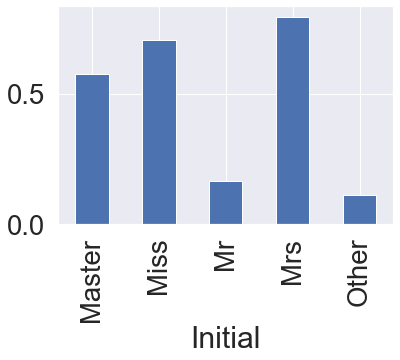

In [184]:
# Initial에 따른 평균 생존률 - barplot
df_train.groupby(by='Initial')['Survived'].mean().plot.bar()

`🔍 OBSERVATION`   
* 평균 나이가 4살인 **Master**의 경우 생존률이 높았다.
* 여자에 해당하는 **Miss**와 **Mrs**의 경우 생존률이 높았다.

In [185]:
# Initial에 따른 피처들의 평균 값들 - mean()
df_train.groupby(by='Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [186]:
# train 데이터의 Age null 값 채우기
# Initial별 Age 평균 값으로 채움
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull()) & (
    df_train.Initial == 'Other'), 'Age'] = 46

In [187]:
# test 데이터의 Age null 값 채우기
# 이 때 절대로 test 데이터의 평균으로 넣으면 안됨
# train 데이터에서 통계 낸 값을 넣어야 함
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial == 'Other'), 'Age'] = 46

### 3.1.2. Fill Null in Embarked

In [188]:
# Embarked의 null 값 개수
print('Number of Embarked Null Value :', sum(df_train['Embarked'].isnull()))

Number of Embarked Null Value : 2


In [189]:
# 가장 많은 S 항구로 null값을 채움
df_train['Embarked'].fillna('S', inplace=True)

In [190]:
# null값이 있는지 검사
df_train['Embarked'].isnull().any()

False

### 3.2. Change Age: continuous to categorical

In [191]:
# 방법 2 : apply와 따로 정의된 함수를 이용하여 변환
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7


# Age_cat : Age를 카테고리화 시킨 새로운 피처 새성
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

# 더이상 필요없는 Age 피처 삭제
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [192]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2


In [193]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2


### 3.3. Change Initial, Embarked, Sex : string to numerical

In [194]:
# Initial
df_train['Initial'] = df_train['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map(
    {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [195]:
# Embarked
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [196]:
# Sex
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

### 3.5. 모든 Feature 간의 상관 관계

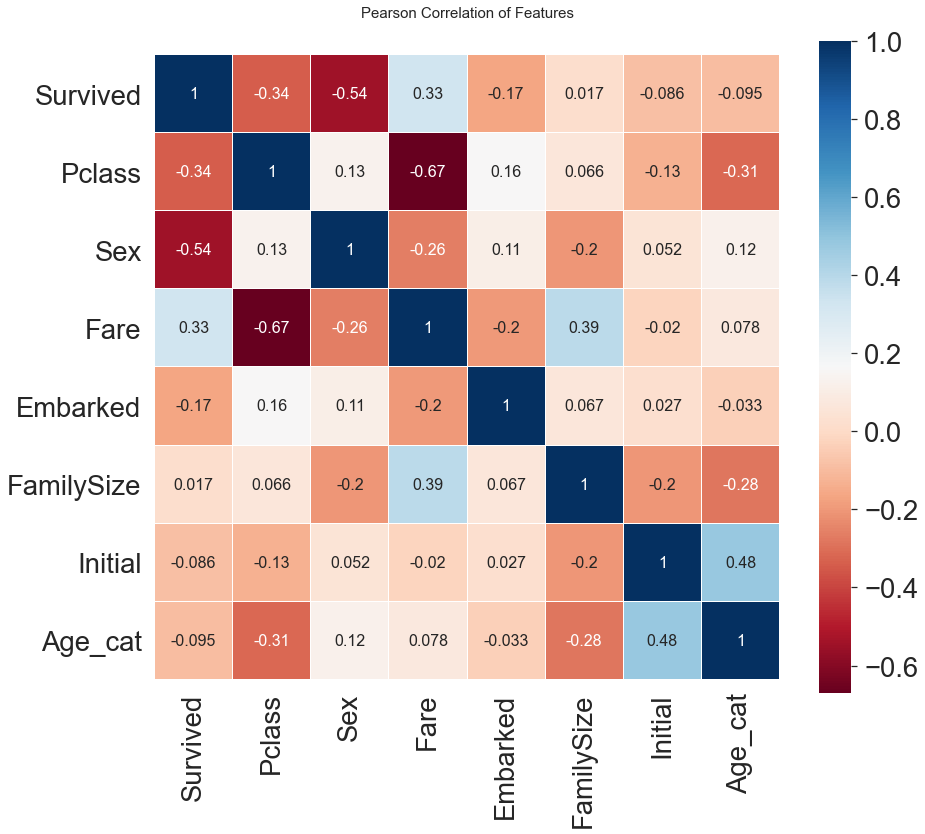

In [197]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex',
                         'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu

plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

del heatmap_data

`🔍 OBSERVATION`   
* **Pclass**, **Sex**, **Fare**가 생존률과 상관관계가 높다.
* 서로 상관관계가 높은 피처는 없으므로 피처 중 불필요한 피처는 없다.

### 3.4. One-hot encoding on Initial and Embarked

In [198]:
# Initial Encoding
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [199]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [200]:
# Embarked Encoding
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [201]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


### 3.5. Drop Columns

In [202]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
               'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch',
              'Ticket', 'Cabin'], axis=1, inplace=True)

In [203]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [204]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


## 4. Building Model and Prediction using the Trained Model

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 4.1. Preparation : Split dataset into train, valid, test set

In [206]:
# target label을 데이터셋에서 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [207]:
# train과 valid set으로 분리
X_tr, X_vld, y_tr, y_vld = train_test_split(
    X_train, target_label, test_size=0.3, random_state=2020)

### 4.2. Model Generation and Prediction

In [208]:
# random forest 모델 생성
model = RandomForestClassifier()
model.fit(X_tr, y_tr)    # 학습
pred = model.predict(X_vld)    # 예측

In [209]:
print('Accuracy : {}%'.format(100 * metrics.accuracy_score(pred, y_vld)))

Accuracy : 80.97014925373134%


### 4.3. Feature Importance

In [210]:
from pandas import Series

# feature importance 추출
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

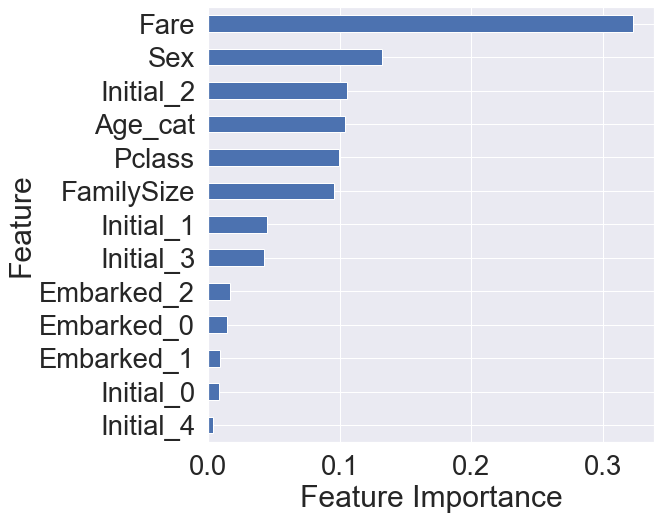

In [211]:
plt.figure(figsize=(8,8))

Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

plt.show()

`🔍 OBSERVATION`   
* **Fare**, **Sex**, **Initial_2**, **Age_cat**, **Pclass**, **FamilySize** 순으로 중요도가 높다.
* Fare가 가장 큰 영향력을 차지하지만 해당 모델에서만 해당되는 경우일 수 있으므로 따로 통계를 내보아야 한다.

### 4.4. Prediction on Test Set

In [212]:
# submission 파일 로드
submission = pd.read_csv('../data/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [213]:
# 예측 후 submission 파일에 저장
pred = model.predict(X_test)
submission['Survived'] = pred
submission.to_csv('../data/youhanlee_submission_3.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
